# **Exercise: Build a Convolutional Neural Network (CNN) for MNIST digit classification**
**Objective:** Create a convolutional neural network to classify handwritten digits from the MNIST dataset.


*Note: MNIST (Modified National Institute of Standards and Technology) is a popular dataset in the field of machine learning and computer vision.*


Key Characteristics:
- **Images:** 28x28 pixels, grayscale (each pixel value ranges from 0 to 255).
- **Classes:** 10 categories, correspondign to the digits 0 through 9.
- **Purpose:** It's primarily used for training image classification algorithms, especially for tasks involving handwritten digit recognition.
- **Simple and Benchmark Dataset:** Due to its simplicity and manageable size, MNIST is often used as a starting point to learn about image classification, neural networks and deep learning algorithms.
n\


In [29]:
# 01. IMPORT LIBRARIES : Importing necessary libraries

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 02. LOAD AND PREPARE THE MNIST DATASET : Load the dataset, split it into training and testing sets, normalize the pixel values to be between 0 and 1, and reshape it to suit the CNN input format.

#Load the dataset
      # train_images: images used for training the model (60 000 images)
      # train_labels (0-9): corresponding to the digits in the training set
      # test_images: images used to test the model after training (10 000 images)
      # test_labels: labels for the test images.
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
      # The raw pixel values of the image range from 0 to 255 (since the image are grayscale). To make it easier for the model to learn, we normalize these values to a range between 0 and 1 dividing by 255.
train_images = train_images / 255.0
test_images = test_images / 255.0

#Reshape images to add a channel dimmension (for grayscale images)
      # CNNs expect input data to have a specific format: height x width x channels.
      # MNIST images are 28x28 pixels but they are grayscale (not RGB) so there's only 1 channel.
      # Initially, MNIST images are just 2D arrays of shape (28,28) but CNNs require a 3D structure where the third dimension represents the color channels (grayscale = 1 channel).
      # So, the reshaping converts the images from 2D (28,28) to 3D (28,28,1) so that the model can correctly process them as an input to a CNN.
      # The [0] in the shape function ensures that all the numbers of the dataset are dynamically captured. This way, the code works even if the dataset size changes in the future, instead of hardcoding the number 60 000.
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
# 03. BUILD THE CNN MODEL : Creating a CNN with a few convolutional layers, followed by a max-pooling layers and dense layers.

      # models.Sequential() is a Keras (powerful deep learning library for Python) API that helps building a neural network model by stacking layers sequentially, one on top of another.
model = models.Sequential()

            #General Guidelines for Number of Layers:
            # 2-4 Layers for simple tasks
            # 5-20 Layers for more complex tasks
            # 50+ Layers for advanced tasks



#First convolutional layer
      # Conv2D (short for 2D Convolutional Layer) applies a convolution operation to the input image to extract important features, such as edges, textures or shapes.
      # 32: number of filters
      # (3,3): size of each filter
      # ReLu activation function is applied to the output of the convolution to introduce non-linearity. This allows the network to learn more complex patterns.
      # input shape (28,28,1): defines the shape of the input image with 28x28 pixels and 1 color channel (grayscale)
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(32, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


#Second convolutional layer
      # This Conv2D layer has 64 filters, extracting more 64 different feature maps, more complex than those in the first layer
      # After the convolutional layer, a MaxPooling2D layer is added. Pooling is a downsampling operation that reduces the spatial dimensions (height and width) of the feature maps
      # MaxPooling2D(2,2) takes a 2x2 window and moves it across the feature maps taking the maximum value from each window. This operation reduces the size of each feature map by a factor of 2
      # If the input feature map is 26x26, after max pooling, it will be 13x13, helping to decrease the computional complexity
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


              #The first Conv2D layer might detect simple features like edges and lines.
              #The second Conv2D layer builds on those basic features, detecting combinations of edges or simple geometric patterns (like corners, textures, etc)


#Third convolutional layer
      # This Conv2D layer has 64 filters
      # In the early layers, the downsampling (reduction of the spatial dimensions - MaxPooling) is helpful because the features extracted are simple, however, in deeper layers ( like the third layer ) the features are more complex, so preserving spatial details become more important for accurate classification.
model.add(layers.Conv2D(64, (3,3), activation='relu'))


#Flatten the output to feed it into fully connected layers
      # The flattening operation is necessary because the fully connected (dense) layers that follow to convolutional layers require 1D input (a vector), whereas the output from the convolutional layers is still in the form of multi-dimensional feature maps (2D or 3D)
      # For example, if the convolutional layer outputs a feature map of shape (7,7,64), flattening will transform it into a 1D vector: 7x7x64 = 3136 elements. This vector can then be passed to a dense layer.
      # Dense layers are typically used at the end of CNNs to perform the final classification or regression task.
model.add(layers.Flatten())


#Fully connected layer
      # Fully connected layer, also called a dense layer, which connects every neuron in the previous layer (the flatten ouput) to every neuron in this new layer.
      # Dense(64) means the layer will have 64 neurons. The choice of 64 neurons is arbitrary and depends on the complexity of the task.
      # After convolutional layers extract features (edges,shapes,textures) the dense layer is resposible for combining these features to make a decision.
      # ReLU introduces non-linearity into the model, which helps the network learn more complex patterns. Without a non-linear activation function, the network would only be able to learn linear transformations, limiting its capacity to handle complex tasks.
      # ReLU works by setting all negative values to 0 and keeping positive values unchanged. This helps the model learn faster.
model.add(layers.Dense(64, activation='relu'))

#Output layer (10 classes for digits 0-9)
      # This is the ouput layer of the neural network. It produces the final predictions, which are probabilities corresponding to each class (digits 0-9 in this case).
      # This layer has 10 neurons, one for each of the 10 possible cases ( digits 0 to 9 ). The purpose of it, is to output probabilities for each class, allowing the model to predict which digit the input image represents.
      # Activation softmax is specifically designed for multi-class classification problems, choosing the class with the highest probability as the final predicted digit.
model.add(layers.Dense(10, activation='softmax'))



In [5]:
# 04. COMPILE THE MODEL : Compiling the model using a loss function (categorical cross-entropy), optimizer (Adam), and evaluation metric (accuracy).

      # Here we are compiling a Keras model, which prepares it for training.
      # optimizer = 'adam'. Adam ( short for Adaptive Moment Estimation ) is a effective optimizer used in deep learning. Optimizers are algorithms that adjust the weights of the neural network during training to minimize the loss function.
      # The loss function measures how well the model's predictions match the true labels. The goal of training is to minimize this loss function.
      # sparse_categorical_crossentropy is used for multi-class classification problems when labels are provided as integer labels. For using categorical_crossentropy, the labels would need to be one-hot encoded.
      # metrics = accuracy. Metrics are used to evaluate the performance of the model during training and testing. Accuracy is calculated as number of correct predictions / total number of predictions

      # model.compile() sets up the model's optimization strategy, loss function, and evaluation metric, making the model ready to start training with model.fit()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
# 05. TRAIN THE MODEL : Train the CNN using the training data.

      # fit() is the method in Keras that starts the training process. This is where the model learns from thr provided training data.
      # During training, the model adjusts its weights through backpropagation and gradient descent in order to minimize the loss function
      # Epochs refer to how many times the model will go through the entire training dataset.
      # For each epoch, the model will go through the entire training data and after each epoch, it will update its weights to improve the accuracy.
      # More epochs usually mean more training, but too many can lead to overfitting
      # Validation is optional but allows us to monitor the model's performance on unseen data after each epoch, which helps to detect if the model is overfitting.

history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

      # The output will show:
            # the number of epochs (1/5, 2/5, 3/5, 4/5, 5/5)
            # the number of training samples ( 1875/1875 )
            # loss: the value of the loss function ( the goal is to minimize this number as much as possible)
            # accuracy: the accuracy of the model on the training data for each epoch
            # val_accuracy: the accuracy on the validation (test) data. This helps monitor whether the model is overfitting (high training accuracy but low validation accuracy)
            # val_loss: the loss on the validation (test) data. This helps to check how well the model generalizes to new data.


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9948 - loss: 0.0156 - val_accuracy: 0.9917 - val_loss: 0.0279
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 56s 30ms/step - accuracy: 0.9966 - loss: 0.0108 - val_accuracy: 0.9918 - val_loss: 0.0285
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9969 - loss: 0.0093 - val_accuracy: 0.9892 - val_loss: 0.0398
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9971 - loss: 0.0083 - val_accuracy: 0.9888 - val_loss: 0.0436
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9973 - loss: 0.0078 - val_accuracy: 0.9921 - val_loss: 0.0336


In [24]:
# 06. EVALUATE THE MODEL : Evaluation the model on the test data to see how well it performs.

      # model.evaluate() function in Keras calculates the loss and the accuracy on the test data.
      # The average loss indicates the model errors when predicting the unseen test data.
      # :6f so the result is presented with 6 decimal places

test_loss, test_acc = model.evaluate(test_images, test_labels)

print(f"Test accuracy: {test_acc:6f}")
print(f"Test loss: {test_loss:6f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9889 - loss: 0.0458
Test accuracy: 0.992100
Test loss: 0.033619


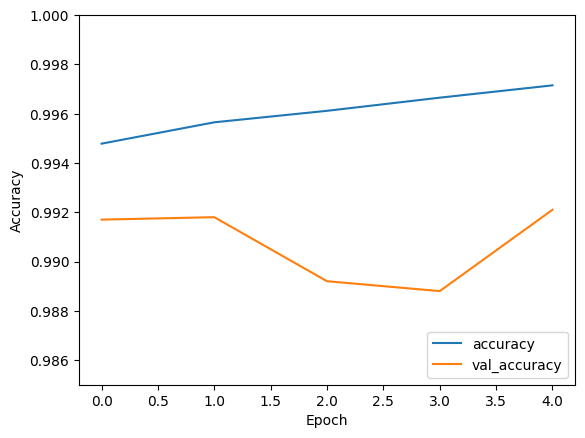

In [28]:
# 07. PLOT TRAINING HISTORY (Optional) : Visualization of the model's accuracy and loss changing over the training epochs.

# Note: In python ( and specifically in Keras ), the epoch numbering starts at 0, in this case, the model was trained for 5 epochs, so the plot will show epochs 0 to 4.
            # Epoch 0 (1st Epoch)
            # Epoch 1 (2nd Epoch)
            # Epoch 2 (3rd Epoch)
            # Epoch 3 (4th Epoch)
            # Epoch 4 (5th Epoch)


# Plot History:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.985, 1])
plt.legend(loc='lower right')
plt.show()

In [43]:
# 08. Make Predictions (Optional) : Making predictions on individual images from the test set.

      # model.predict() function generates predictions based on the input data. In this case it will take the test images and predict which digit (0-9) each image represents.
      # The test images will be passed to model.predict() and it returns an array of predictions for each image.

predictions = model.predict(test_images)

        #OPTIONAL : Prints the prediction array for the first test image
print(predictions[0])


# To get the predicted class for a specific test image ( the first one [0] in this case ):
print("The number represented on the image is:",np.argmax(predictions[0])) # Prints the predicted digit


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
[2.6398726e-13 3.7151164e-08 1.3368680e-10 5.8959682e-08 1.2164604e-08
 2.5829238e-13 2.1554613e-16 9.9999994e-01 3.0588403e-12 2.0771569e-09]
The number represented on the image is: 7
